In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


In [19]:
#Importing the data:
CSV_PATH = "./data/clean_data.csv"
N_ROWS = None

df = pd.read_csv(CSV_PATH, nrows=N_ROWS)
df = df[df["grup ATC nivell 1"] == "SISTEMA NERVIOSO"]

In [20]:
age_bins = {
    "0–4":  ["0-1", "2-3", "4-5"],
    "5–11": ["6-7", "8-9", "10-11"],
    "12–17": ["12-13", "14-15", "16-17"],
    "18–29": ["18-19", "20-24", "25-29"],
    "30–39": ["30-34", "35-39"],
    "40–49": ["40-44", "45-49"],
    "50–59": ["50-54", "55-59"],
    "60–69": ["60-64", "65-69"],
    "70–79": ["70-74", "75-79"],
    "80+":   ["80-84", "84+"]
}

age_map = {}
for macro, subgroups in age_bins.items():
    for sg in subgroups:
        age_map[sg] = macro

df["macro_age"] = df["grup d'edat"].map(age_map)

# Attempt

In [21]:
def donut_atc4_sex(df_sub, age_label, sex, outpath, topN=7):

    # Filter to one sex
    df_sex = df_sub[df_sub["sexe"] == sex]

    if df_sex.empty:
        print("Empty:", age_label, sex)
        return

    # Aggregate ATC4
    counts = (
        df_sex.groupby("grup ATC nivell 3")["nombre de receptes"]
              .sum()
              .sort_values(ascending=False)
    )

    if counts.sum() == 0:
        return

    # top N + Other
    top = counts.head(topN)
    other_sum = counts.iloc[topN:].sum()

    labels = top.index.tolist()
    values = top.values.tolist()

    if other_sum > 0:
        labels.append("Other")
        values.append(other_sum)

    # --- PLOT ---
    fig, ax = plt.subplots(figsize=(6, 6))

    wedges = ax.pie(
        values,
        labels=None,                # NO TEXT on wedges
        startangle=90,
        wedgeprops=dict(width=0.35)
    )

    # hole inside
    centre = plt.Circle((0,0), 0.60, fc="white")
    ax.add_artist(centre)

    ax.set_title(f"ATC4 — {age_label} — {sex}", fontsize=14)

    # LEGEND outside
    ax.legend(
        wedges[0], labels,
        title="ATC4 groups",
        loc="center left",
        bbox_to_anchor=(1.0, 0.5),
        fontsize=9
    )

    plt.tight_layout()
    plt.savefig(outpath, dpi=150, bbox_inches="tight")
    plt.close()


In [22]:
outdir = Path("../plots/age_and_sex/donuts_macro_age_sex")
outdir.mkdir(parents=True, exist_ok=True)

sexes = ["Home", "Dona"]

for age_group in df["macro_age"].dropna().unique():
    
    df_age = df[df["macro_age"] == age_group]

    for sex in sexes:

        safe_age = str(age_group).replace(" ", "_")
        safe_sex = sex

        outfile = outdir / f"donut_{safe_age}_{safe_sex}.png"

        donut_atc4_sex(
            df_sub=df_age,
            age_label=age_group,
            sex=sex,
            outpath=outfile,
            topN=7
        )

        print("Saved:", outfile)

Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_0–4_Home.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_0–4_Dona.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_5–11_Home.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_5–11_Dona.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_12–17_Home.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_12–17_Dona.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_18–29_Home.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_18–29_Dona.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_30–39_Home.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_30–39_Dona.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_40–49_Home.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_40–49_Dona.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_50–59_Home.png
Saved: ..\plots\age_and_sex\donuts_macro_age_sex\donut_50–59_Dona.png
Saved: ..\plots\age_and_se

# More Stuff

In [45]:
df.columns

Index(['any', 'mes', 'codi de la regió sanitària', 'regió sanitària',
       'grup d'edat', 'sexe', 'codi del grup ATC nivell 1',
       'grup ATC nivell 1', 'codi del grup ATC nivell 2', 'grup ATC nivell 2',
       'codi del grup ATC nivell 3', 'grup ATC nivell 3',
       'codi del grup ATC nivell 4', 'grup ATC nivell 4', 'nombre de receptes',
       'nombre d'envasos', 'import íntegre', 'import aportació CatSalut',
       'macro_age'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
df2 = df.groupby("grup ATC nivell 4")["nombre de receptes"].sum()
ax.pie(df2['nombre de receptes'], labels=df2['grup ATC nivell 4'], wedgeprops={'width':0.4})
ax.set_title("Donut Plot")

plt.show()

In [ ]:
df2 = df.groupby("grup ATC nivell 4")["nombre de receptes"].sum()
for mac in df["macro_age"].unique()
    fig, ax = plt.subplots(figsize=(5, 5))
    df_mac = df[df['macro_age']==]
    ax.pie(df['nombre de receptes'], labels=df['grup ATC nivell 4'], wedgeprops={'width':0.4})
    ax.set_title("Donut Plot")
    
    plt.show()

# HEHE

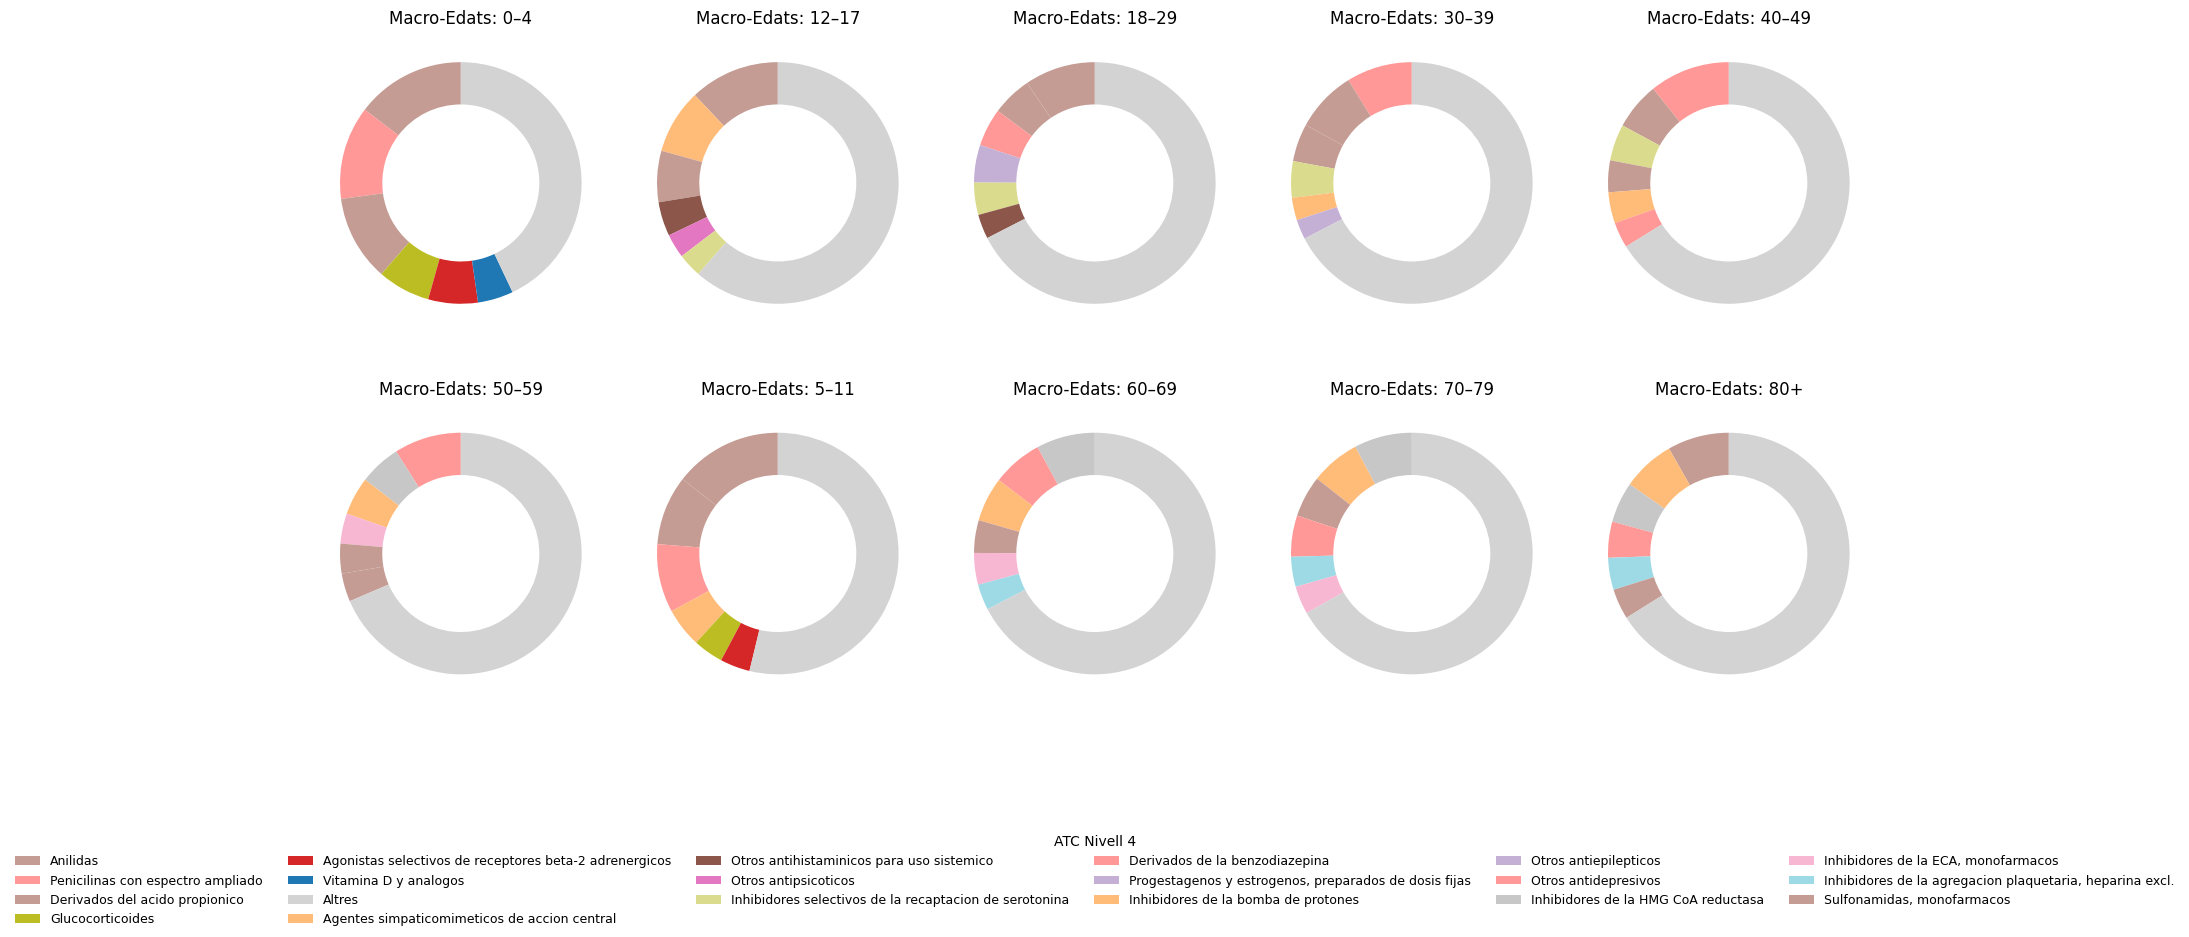

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


TOP_K = 6   # ←←← change this to any number you want

counts = (
    df.groupby(["macro_age", "grup ATC nivell 4"])["nombre de receptes"]
      .sum()
      .reset_index()
)

macro_ages = sorted(counts["macro_age"].unique())


all_atc4 = sorted(counts["grup ATC nivell 4"].unique())
cmap = plt.get_cmap("tab20")
colors = [cmap(i % 20) for i in range(len(all_atc4))]
global_color_map = dict(zip(all_atc4, colors))

ALTRES_COLOR = "lightgray"


n = len(macro_ages)
rows = 2
cols = int(np.ceil(n / rows))

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()

legend_items = {}

for idx, macro in enumerate(macro_ages):
    ax = axes[idx]
    
    subset = counts[counts["macro_age"] == macro]
    subset = subset.sort_values("nombre de receptes", ascending=False)

    # ---- Select top K and group the others ----
    topk = subset.head(TOP_K)
    others_sum = subset["nombre de receptes"].iloc[TOP_K:].sum()

    labels = topk["grup ATC nivell 4"].tolist()
    values = topk["nombre de receptes"].tolist()

    if others_sum > 0:
        labels.append("Altres")
        values.append(others_sum)

    # Colors
    plot_colors = [
        global_color_map[l] if l in global_color_map else ALTRES_COLOR
        for l in labels
    ]

    # Register for legend
    for l in labels:
        if l not in legend_items:
            legend_items[l] = (
                global_color_map[l] if l in global_color_map else ALTRES_COLOR
            )

    # Donut chart
    ax.pie(
        values,
        colors=plot_colors,
        startangle=90,
        wedgeprops=dict(width=0.35)
    )
    
    ax.set_title(f"Macro-Edats: {macro}", fontsize=12)

# Hide empty axes
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")


legend_handles = [
    Patch(facecolor=legend_items[l], label=l)
    for l in legend_items
]

fig.legend(
    handles=legend_handles,
    loc="lower center",
    ncol=min(len(legend_handles), 6),
    title="ATC Nivell 4",
    fontsize=9,
    frameon=False
)

plt.tight_layout(rect=[0, 0.13, 1, 1])
plt.show()
